In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, precision_score,recall_score,confusion_matrix, roc_auc_score
import graphviz
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
data = pd.read_csv("archive/card_transdata.csv", index_col=False)
print(data.columns)
print(data.shape)
# data.describe()

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
(1000000, 8)


In [4]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Train
0 - 0.9125975%
1 - 0.0874025%


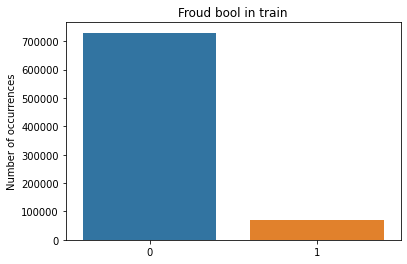

Test
0 - 0.912595%
1 - 0.087405%


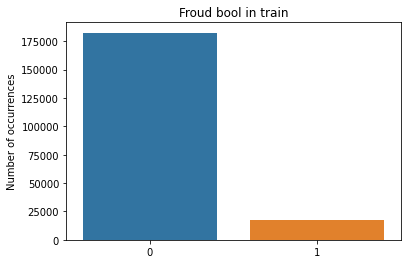

In [5]:
print("Train")
count_train = [np.sum(y_train == i)for i in range(2)]
sns.barplot(x=[0,1], y=count_train)
print(f"0 - {count_train[0]/len(y_train)}%")
print(f"1 - {count_train[1]/len(y_train)}%")
# plt.xlabel('Ratio') 
plt.ylabel('Number of occurrences') 
plt.title("Froud bool in train")
plt.show()

print("Test")
count_train = [np.sum(y_test == i)for i in range(2)]
sns.barplot(x=[0,1], y=count_train)
print(f"0 - {count_train[0]/len(y_test)}%")
print(f"1 - {count_train[1]/len(y_test)}%")
# plt.xlabel('Ratio') 
plt.ylabel('Number of occurrences') 
plt.title("Froud bool in train")
plt.show()


# Drzewo decyzyjne


In [6]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [7]:
print(f"Errors: {np.sum(clf.predict(X)!=y)}")

Errors: 0


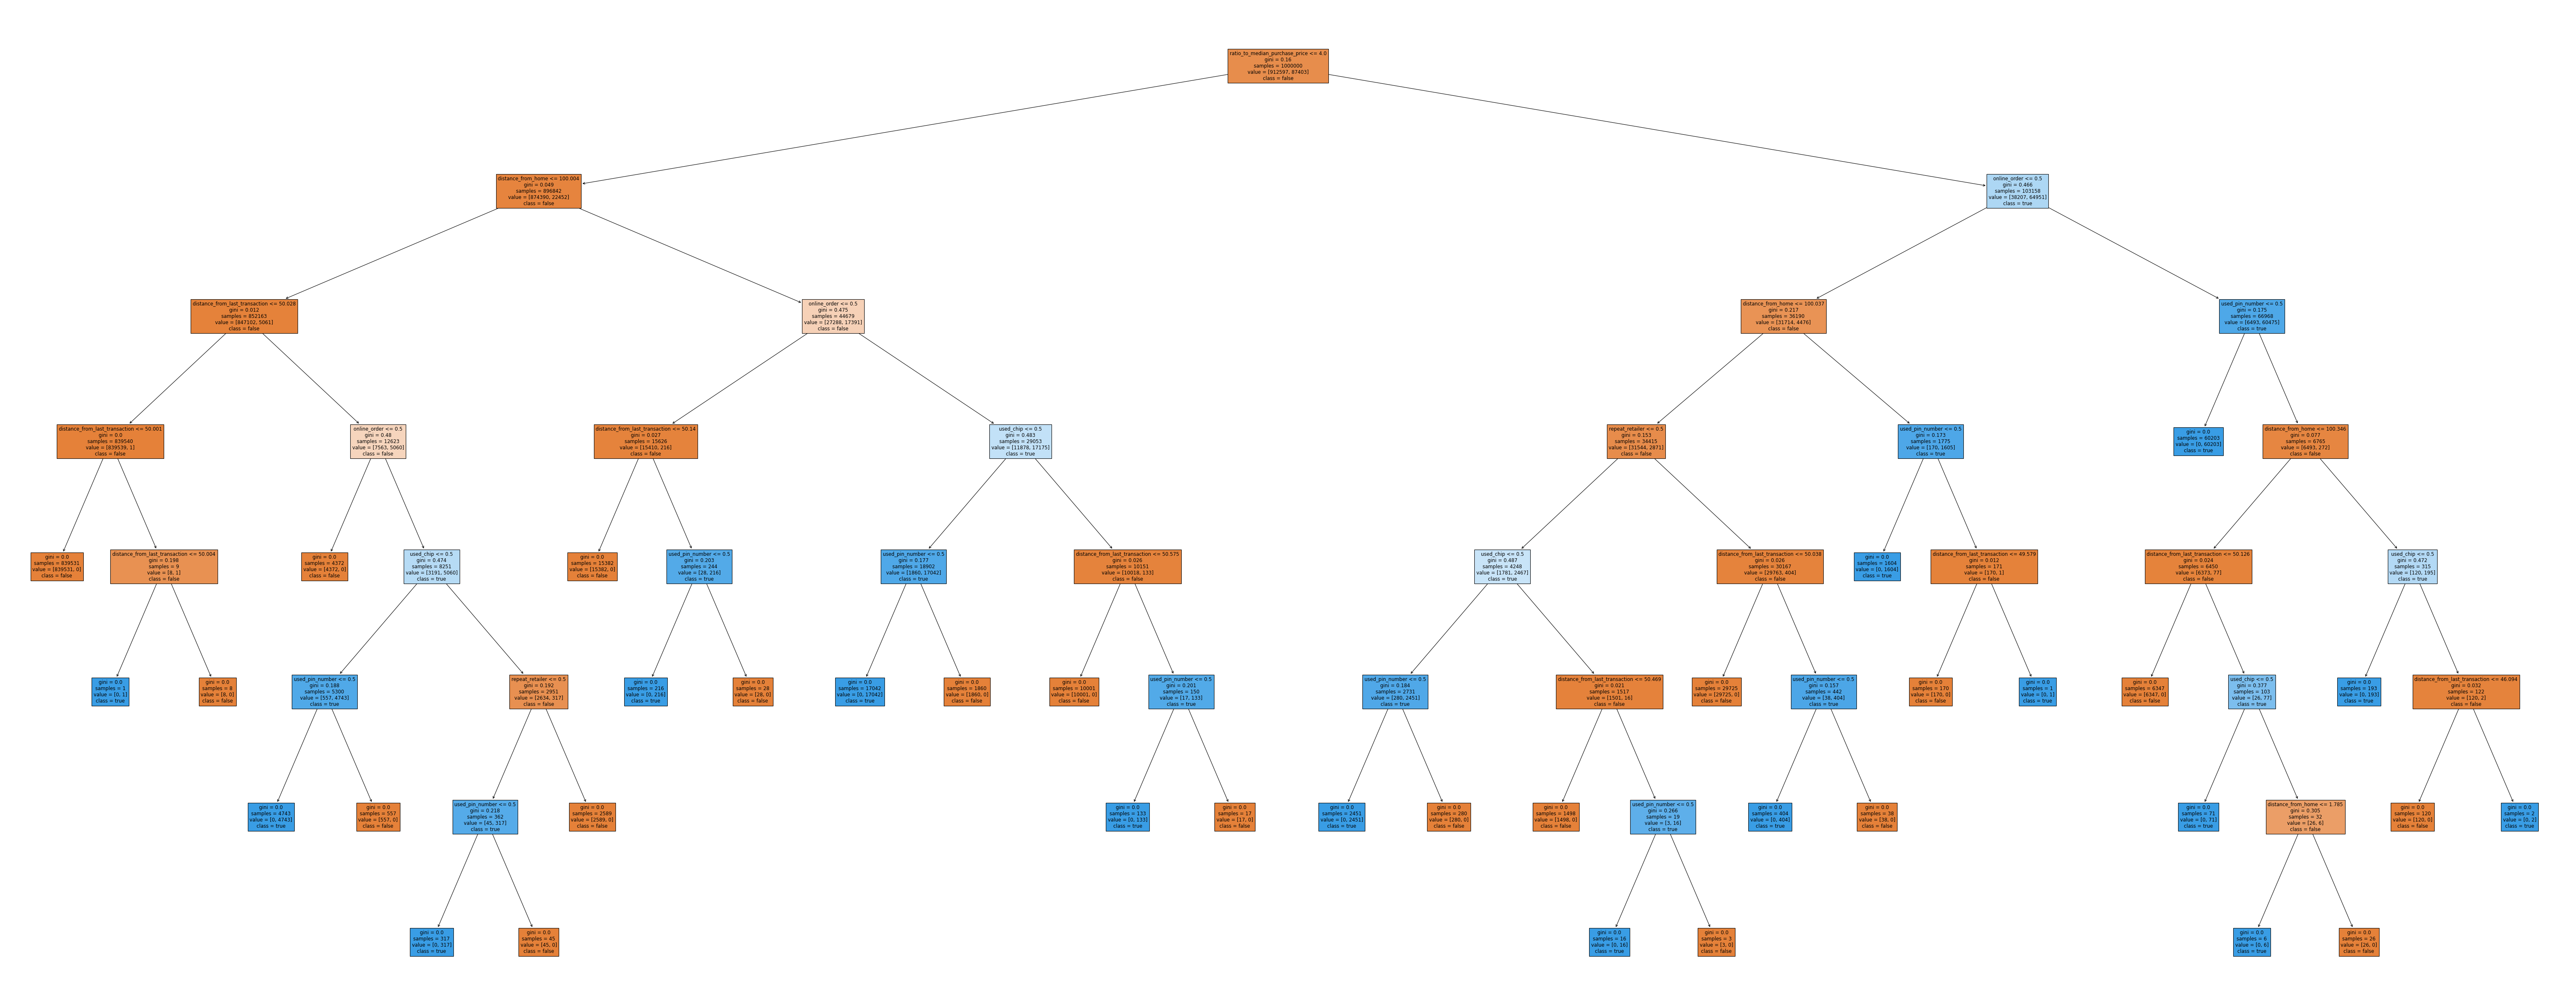

In [8]:
feature_names = data.columns.to_list()[:-1]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,40), dpi=80)

tree.plot_tree(clf,feature_names = feature_names, class_names= ["false", "true"],filled = True);
fig.savefig('imagename.png', transparent= False)


Errors: 60659


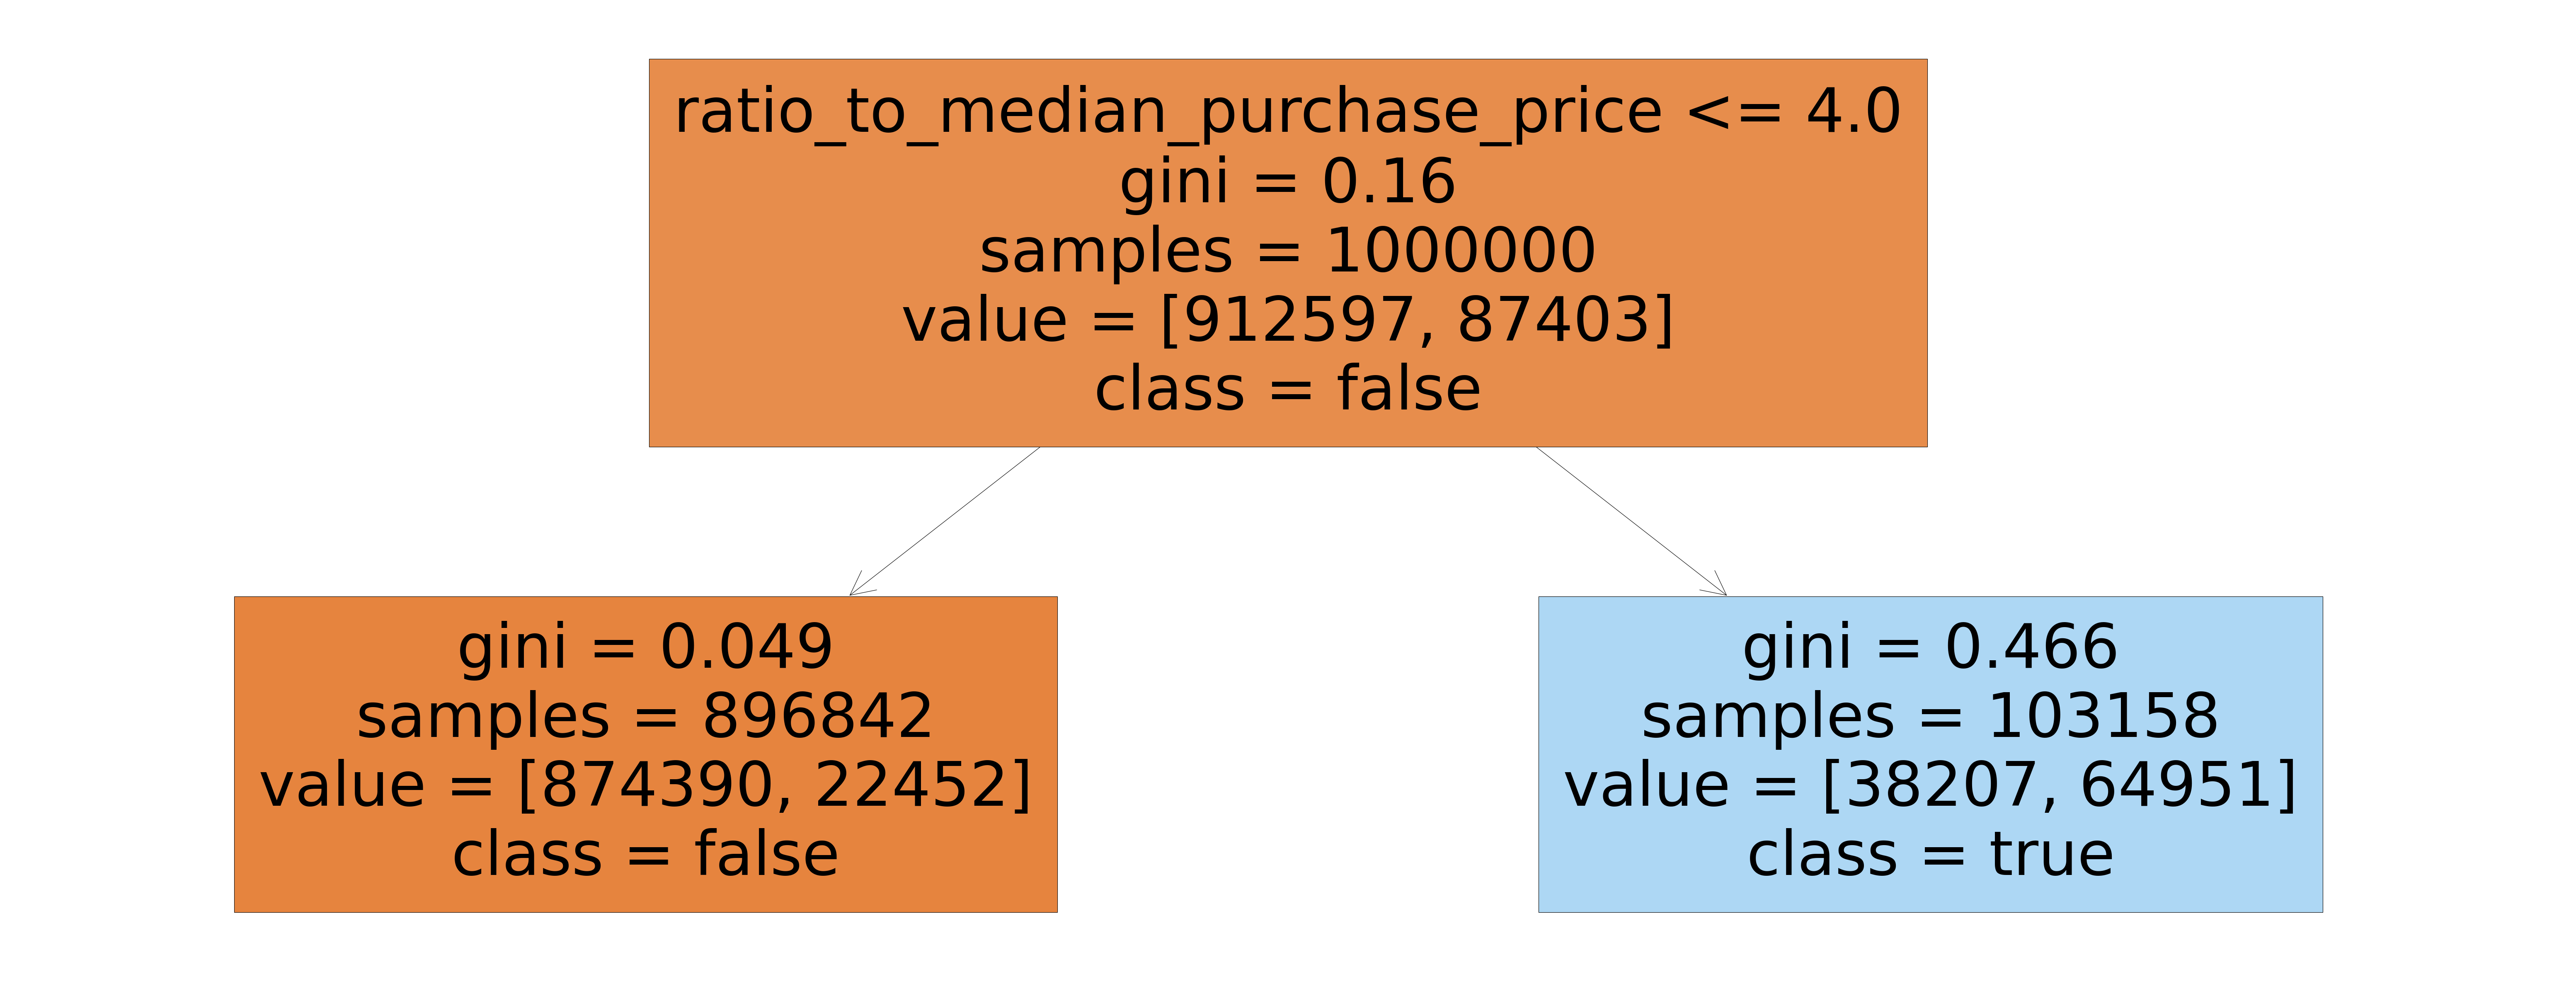

In [29]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)
feature_names = data.columns.to_list()[:-1]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,40), dpi=80)

tree.plot_tree(clf,feature_names = feature_names, class_names= ["false", "true"],filled = True);
fig.savefig('imagename.png', transparent= False)

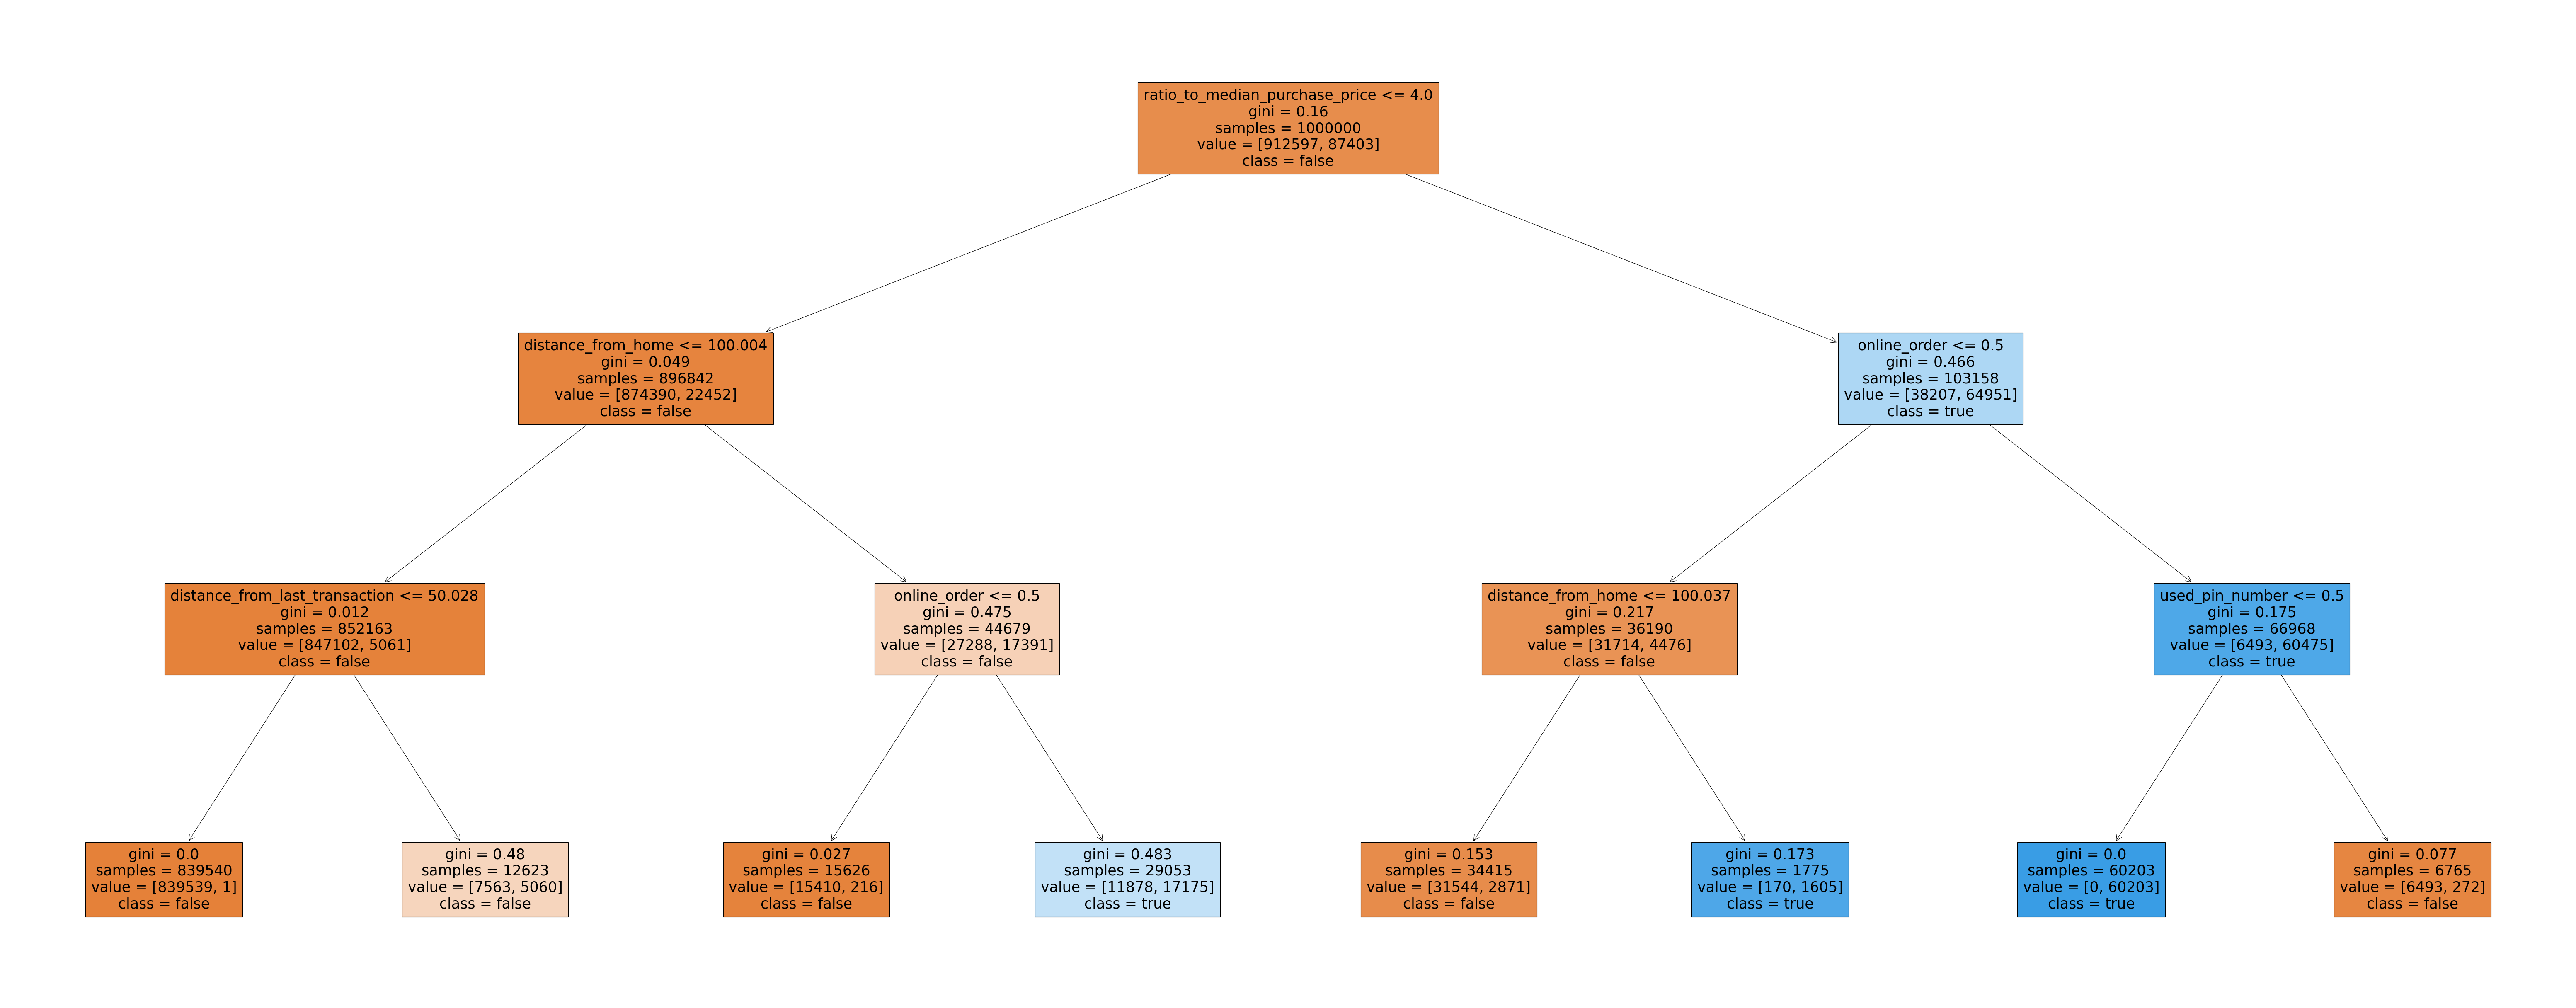

In [31]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
feature_names = data.columns.to_list()[:-1]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,40), dpi=80)

tree.plot_tree(clf,feature_names = feature_names, class_names= ["false", "true"],filled = True);
fig.savefig('imagename.png', transparent= False)

In [9]:
clf = DecisionTreeClassifier()
params = [{'criterion': ['gini', 'entropy'],
         'max_depth': [8,6,4],
         'min_samples_leaf': [1, 5, 20, 50, 80]}]
gs_knn = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits =5))
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}

In [10]:
f1_list = []
precision_list = []
recall_list = []

f1_list_ = []
precision_list_ = []
recall_list_ = []

for deep in range(8):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=deep+1, min_samples_leaf=1, class_weight={0:1,1:10})
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_train)
    f1_list_.append(f1_score(y_train, y_pred))
    precision_list_.append(precision_score(y_train, y_pred))
    recall_list_.append(recall_score(y_train, y_pred))

    y_pred = clf.predict(X_test)
    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))


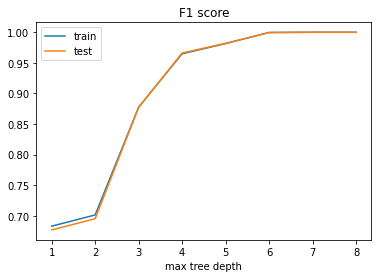

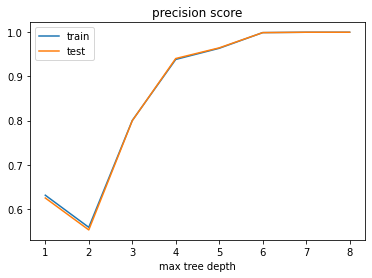

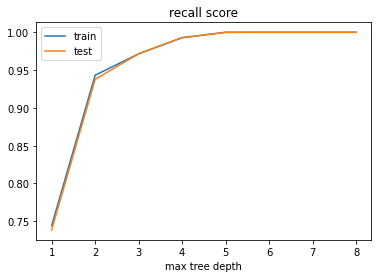

In [11]:
x = [i+1 for i in range(8)]
plt.plot(x,f1_list_, label = "train")
plt.plot(x,f1_list, label = "test")
plt.xlabel("max tree depth")
plt.legend()
plt.title("F1 score")
plt.show()

plt.plot(x,precision_list_, label = "train")
plt.plot(x,precision_list, label = "test")
plt.xlabel("max tree depth")
plt.legend()
plt.title("precision score")
plt.show()

plt.plot(x,recall_list_, label = "train")
plt.plot(x,recall_list, label = "test")
plt.xlabel("max tree depth")
plt.legend()
plt.title("recall score")
plt.show()


In [12]:
print(f1_list_)
print(precision_list_)
print(recall_list_)

[0.6828993038468857, 0.7013010490272704, 0.8774488589754356, 0.9648126654944504, 0.981484860820618, 0.9995997140814868, 1.0, 1.0]
[0.6308872913307552, 0.5581556742300499, 0.8000706755403734, 0.9384438585817616, 0.9636694415348145, 0.9991997484923834, 1.0, 1.0]
[0.7442578873602014, 0.9431938445696634, 0.9713966991790852, 0.9927061582906668, 0.9999713966991791, 1.0, 1.0, 1.0]


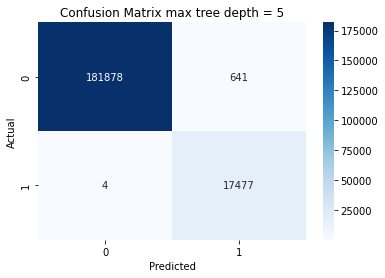

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, class_weight={0:1,1:10})
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix max tree depth = 5")
plt.show()

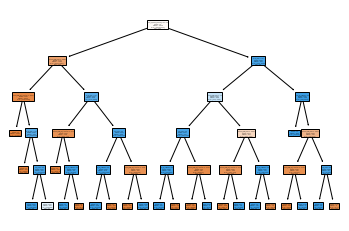

In [14]:
tree.plot_tree(clf,feature_names = feature_names, class_names= ["false", "true"],filled = True);
fig.savefig('imagename.png', transparent= False)

In [15]:
clfNB = GaussianNB()
clfNB.fit(X_train, y_train)
y_pred = clfNB .predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

F1 0.6835492480958271
precision 0.7929914659013669
recall 0.6006521366054574
acc 0.95139


Text(0.5, 1.0, 'Confusion Matrix GaussianNB')

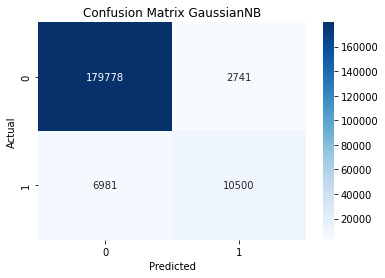

In [16]:
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix GaussianNB")

F1 0.617872434260093
precision 0.4551410471601061
recall 0.9617298781534237
acc 0.896025


Text(0.5, 1.0, 'Confusion Matrix GaussianNB')

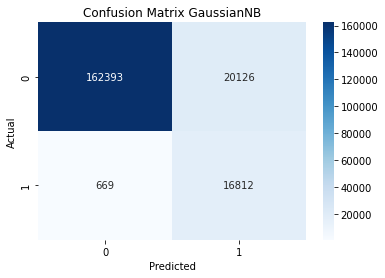

In [17]:
# oversampler = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

clfNB = GaussianNB()
clfNB.fit(X_train_resampled, y_train_resampled)
y_pred = clfNB .predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix GaussianNB")

F1 0.6851112378779236
precision 0.5320380976489574
recall 0.9618442880842057
acc 0.92272


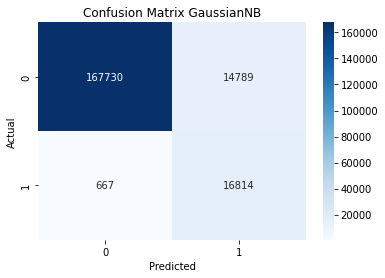

In [18]:
smote_pipeline = make_pipeline(SMOTE(random_state=22), 
                              GaussianNB(var_smoothing=1e-07))

smote_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = smote_pipeline.predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix GaussianNB")
plt.show()

F1 0.7629987908101571
precision 0.6427927751439878
recall 0.9385046622046793
acc 0.94904


Text(0.5, 1.0, 'Confusion Matrix GaussianNB')

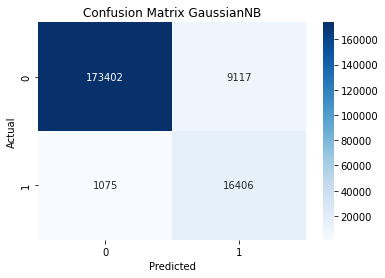

In [19]:
tomekU = SMOTETomek()
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

clfNB = GaussianNB(var_smoothing=1e-06)
clfNB.fit(X_underT, y_underT)
y_pred = clfNB .predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix GaussianNB")

#Random forest

In [20]:
rf = RandomForestClassifier(n_estimators=20, max_depth= 2, criterion='entropy',class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

F1 0.766293028806777
precision 0.6483842863931569
recall 0.9366168983467765
acc 0.950065


In [21]:
f1_list = []
precision_list = []
recall_list = []

f1_list_ = []
precision_list_ = []
recall_list_ = []

# oversampler = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

for n in [1, 2, 5, 10, 15, 20, 25, 30, 40]:
    clf = RandomForestClassifier(n_estimators=n, max_depth= 3, criterion='entropy',class_weight='balanced')
    clf.fit(X_train_resampled, y_train_resampled)
    
    y_pred = clf.predict(X_train)
    f1_list_.append(f1_score(y_train, y_pred))
    precision_list_.append(precision_score(y_train, y_pred))
    recall_list_.append(recall_score(y_train, y_pred))

    y_pred = clf.predict(X_test)
    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))

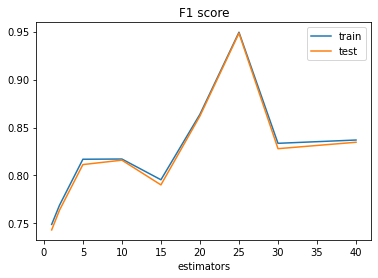

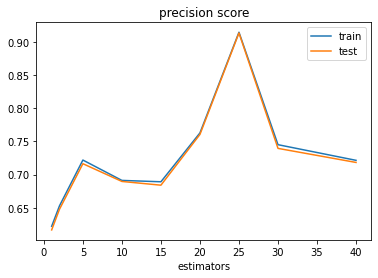

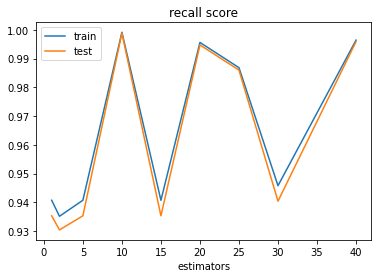

In [22]:
x = [1, 2, 5, 10, 15, 20, 25, 30, 40]
plt.plot(x,f1_list_, label = "train")
plt.plot(x,f1_list, label = "test")
plt.xlabel("estimators")
plt.legend()
plt.title("F1 score")
plt.show()

plt.plot(x,precision_list_, label = "train")
plt.plot(x,precision_list, label = "test")
plt.xlabel("estimators")
plt.legend()
plt.title("precision score")
plt.show()

plt.plot(x,recall_list_, label = "train")
plt.plot(x,recall_list, label = "test")
plt.xlabel("estimators")
plt.legend()
plt.title("recall score")
plt.show()

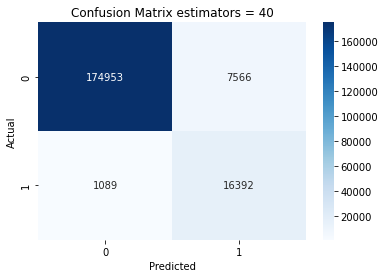

In [23]:
clf = RandomForestClassifier(n_estimators=40, max_depth= 3, criterion='entropy',class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix estimators = 40")
plt.show()

# GradientBoosting

F1 0.9989410114771459
precision 0.9995990376904571
recall 0.9982838510382701
acc 0.999815


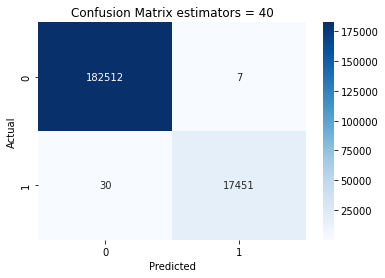

In [24]:
clf = GradientBoostingClassifier(loss='log_loss')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix estimators = 40")
plt.show()

C:\Users\baros\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


F1 0.9989410114771459
precision 0.9995990376904571
recall 0.9982838510382701
acc 0.999815


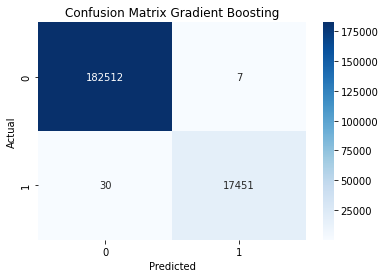

In [25]:
clf = GradientBoostingClassifier(loss='deviance')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("F1",f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("acc", np.sum(y_test == y_pred)/len(y_pred))

cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Gradient Boosting")
plt.show()

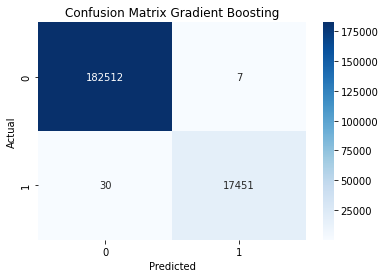

In [26]:
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Gradient Boosting")
plt.show()

In [27]:
data2 = data.drop_duplicates()
data2.shape

(1000000, 8)